<a href="https://colab.research.google.com/github/vishnuv0007/ICT_Assignments/blob/main/Vishnu_V_Assignment6_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [172]:
#Question 1

In [173]:
#load titanic dataset to Python environment
data=pd.read_csv('/content/titanic_dataset .csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [174]:
#checking for null values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [175]:
#check basic info in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
#check statistical info in the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
#Question 2: Preprocessing

In [178]:
#Handling missing values

Passenger ID, name and ticket are individual basis. So those columns can be deleted. Since cabin is having more than 50% missing values, that columns also deleted.


In [179]:
data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


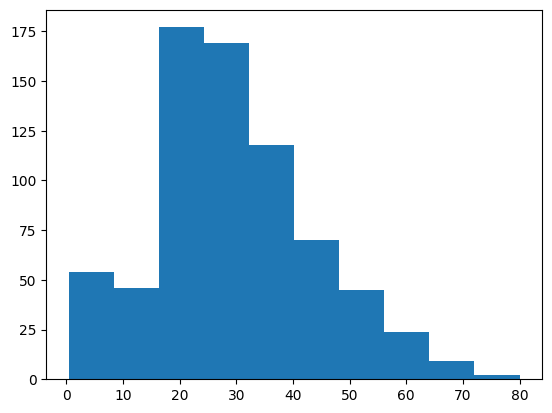

In [180]:
plt.hist(data['Age']);

Age is having approximate normal distribution, so missing values are filled with mean.

In [181]:
data['Age']=data['Age'].fillna(data['Age'].mean())

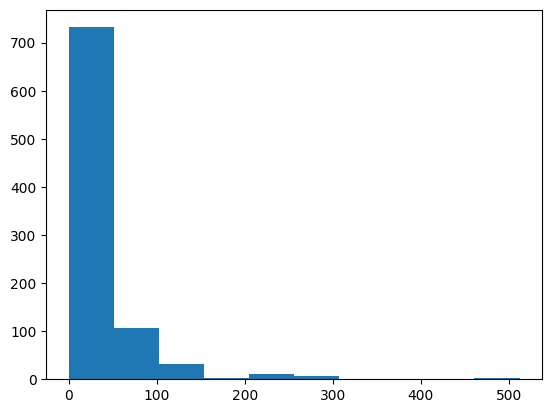

In [182]:
plt.hist(data['Fare']);

'Embarked' columns is categorical and has only 2 missing values. So filled with mode

In [183]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [184]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [185]:
#Handling outliers

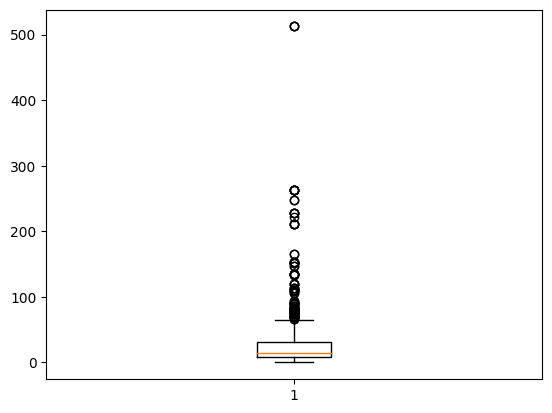

In [186]:
plt.boxplot(data['Fare']);

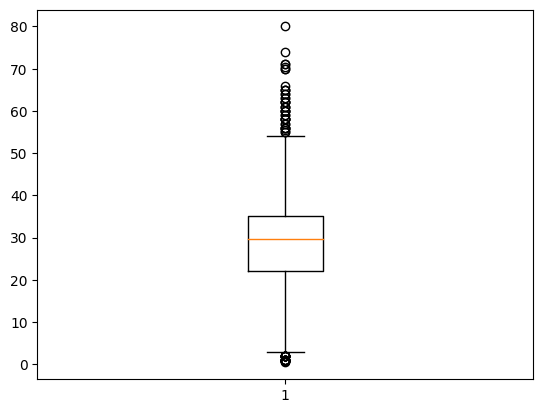

In [187]:
plt.boxplot(data['Age']);

In [188]:
df=data.sort_values(by='Fare',ascending=0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.000000,0,0,512.3292,C
737,1,1,male,35.000000,0,0,512.3292,C
679,1,1,male,36.000000,0,1,512.3292,C
88,1,1,female,23.000000,3,2,263.0000,S
27,0,1,male,19.000000,3,2,263.0000,S
...,...,...,...,...,...,...,...,...
633,0,1,male,29.699118,0,0,0.0000,S
413,0,2,male,29.699118,0,0,0.0000,S
822,0,1,male,38.000000,0,0,0.0000,S
732,0,2,male,29.699118,0,0,0.0000,S


It is found three rows in dataset are having very high values in 'Fare' column (512.3292). It is found that model build using the three outliers removed is giving more accuracy. So, decided to delete the three outliers

In [189]:
data=data[data['Fare']!=512.3292]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [190]:
num_col_corr=['Survived','Pclass','Age','SibSp','Parch','Fare']
corr_matrix=data[num_col_corr].corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.071882,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,-0.330522,0.080937,0.018212,-0.604960
Age,-0.071882,-0.330522,1.000000,-0.232092,-0.179336,0.093604
SibSp,-0.033395,0.080937,-0.232092,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.179336,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,0.093604,0.211816,0.263910,1.000000


In [191]:
#Encoding

In [192]:
data['Sex'].value_counts()

,count
Sex,
male,575
female,313


In [193]:
#encoding Sex columns with label encoding since Sex is having only two unique values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data

<ipython-input-193-d0e2a50e7073>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=le.fit_transform(data['Sex'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [194]:
#encoding Embarked columns with one hot encoding since Embarked is having three unique values
data_encoded=pd.get_dummies(data,dtype='int64')
data_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [195]:
data_encoded['Sex'].value_counts()

,count
Sex,
1,575
0,313


In [196]:
#Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_col=['Age','Fare']
data_encoded[num_col]=ss.fit_transform(data_encoded[num_col])
data_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.590209,1,0,-0.566959,0,0,1
1,1,1,0,0.639380,1,0,0.989016,1,0,0
2,1,3,0,-0.282812,0,0,-0.550557,0,0,1
3,1,1,0,0.408832,1,0,0.547171,0,0,1
4,0,3,1,0.408832,0,0,-0.547519,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.205962,0,0,-0.427237,0,0,1
887,1,1,0,-0.820757,0,0,-0.014146,0,0,1
888,0,3,0,0.001463,1,2,-0.173308,0,0,1
889,1,1,1,-0.282812,0,0,-0.014146,1,0,0


In [198]:
#Question 3: kNN and SVM models

In [199]:
x=data_encoded.drop('Survived',axis=1)
y=data_encoded['Survived']

In [200]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,-0.590209,1,0,-0.566959,0,0,1
1,1,0,0.639380,1,0,0.989016,1,0,0
2,3,0,-0.282812,0,0,-0.550557,0,0,1
3,1,0,0.408832,1,0,0.547171,0,0,1
4,3,1,0.408832,0,0,-0.547519,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,-0.205962,0,0,-0.427237,0,0,1
887,1,0,-0.820757,0,0,-0.014146,0,0,1
888,3,0,0.001463,1,2,-0.173308,0,0,1
889,1,1,-0.282812,0,0,-0.014146,1,0,0


In [201]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [202]:
#split to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [203]:
x_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,3,1,0.001463,1,1,-0.372665,1,0,0
239,2,1,0.255133,0,0,-0.444854,0,0,1
382,3,1,0.178284,0,0,-0.550557,0,0,1
794,3,1,-0.359661,0,0,-0.551266,0,0,1
684,2,1,2.330063,1,1,0.204549,0,0,1
...,...,...,...,...,...,...,...,...,...
106,3,0,-0.667058,0,0,-0.557239,0,0,1
271,3,1,-0.359661,0,0,-0.743130,0,0,1
863,3,0,0.001463,8,2,0.946897,0,0,1
436,3,0,-0.667058,2,2,0.092164,0,0,1


In [204]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
281,3,1,-0.129113,0,0,-0.552277,0,0,1
435,1,0,-1.205003,1,2,2.172805,0,0,1
39,3,0,-1.205003,1,0,-0.469963,1,0,0
418,2,1,0.024585,0,0,-0.427237,0,0,1
585,1,0,-0.897606,0,2,1.192322,0,0,1
...,...,...,...,...,...,...,...,...,...
433,3,1,-0.974455,0,0,-0.569996,0,0,1
809,1,0,0.255133,1,0,0.547171,0,0,1
25,3,0,0.639380,1,5,0.019569,0,0,1
84,2,0,-0.974455,0,0,-0.487986,0,0,1


In [205]:
y_train

,Survived
709,1
239,0
382,0
794,0
684,0
...,...
106,1
271,1
863,0
436,0


In [206]:
y_test

,Survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
809,1
25,1
84,1


In [207]:
#kNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
metric_k=[]
neighbors=np.arange(3,15)
for i in neighbors:
  knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=4)
  model_knn=knn.fit(x_train,y_train)
  y_pred=model_knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k


[0.8539325842696629,
 0.8764044943820225,
 0.8314606741573034,
 0.8370786516853933,
 0.8202247191011236,
 0.8370786516853933,
 0.8314606741573034,
 0.8370786516853933,
 0.848314606741573,
 0.8314606741573034,
 0.8314606741573034,
 0.8258426966292135]

In [209]:
#In above step, highest accuracy is obtained for k=4
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=4)
model_knn=classifier.fit(x_train,y_train)
y_pred=model_knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

In [210]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.8764044943820225
Precision is 0.8823529411764706
Recall is 0.8108108108108109
f1 score is 0.8450704225352113


In [211]:
confusion_matrix(y_test,y_pred)

array([[96,  8],
       [14, 60]])

In [212]:
#SVM

In [213]:
from sklearn.svm import SVC
sv_clf=SVC()
model_svc=sv_clf.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1])

In [214]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.848314606741573
Precision is 0.821917808219178
Recall is 0.8108108108108109
f1 score is 0.8163265306122449


In [215]:
confusion_matrix(y_test,y_pred)

array([[91, 13],
       [14, 60]])

In [216]:
#Question 4: Cross validation

In [217]:
#k-fold cross validation with kNN model

In [218]:
from sklearn.model_selection import KFold
kfold_val=KFold(10)

In [219]:
for train_index,test_index in kfold_val.split(x,y):
  print('Training index:',train_index)
  print('Test index:',test_index)

Training index: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 33

In [220]:
#Accuracy of the kNN model built in Question 3 with k fold cross validation with 10 number of folds
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model_knn,x,y,cv=kfold_val)
kv_result

array([0.76404494, 0.83146067, 0.74157303, 0.80898876, 0.78651685,
       0.76404494, 0.82022472, 0.76404494, 0.82954545, 0.79545455])

In [221]:
print('Average accuracy of the kNN model with k fold cross validation is',np.mean(kv_result))

Average accuracy of the kNN model with k fold cross validation is 0.7905898876404495


In [222]:
#k fold cross validation with SVM model

In [223]:
#Accuracy of the SVM model built in Question 3 with k fold cross validation with 10 number of folds
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model_svc,x,y,cv=kfold_val)
kv_result

array([0.79775281, 0.85393258, 0.78651685, 0.87640449, 0.78651685,
       0.79775281, 0.79775281, 0.78651685, 0.88636364, 0.85227273])

In [224]:
print('Average accuracy of the SVM model with k fold cross validation is',np.mean(kv_result))

Average accuracy of the SVM model with k fold cross validation is 0.8221782431052095


In [225]:
#Stratified cross validation with kNN model

In [226]:
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)

In [227]:
#Accuracy of the kNN model built in Question 3 with Stratified cross validation with 10 number of folds
skv_result=cross_val_score(model_knn,x,y,cv=sk_fold)
skv_result

array([0.78651685, 0.76404494, 0.74157303, 0.84269663, 0.82022472,
       0.75280899, 0.84269663, 0.7752809 , 0.80681818, 0.80681818])

In [228]:
print('Average accuracy of the kNN model with stratified cross validation is',np.mean(skv_result))

Average accuracy of the kNN model with stratified cross validation is 0.7939479060265577


In [229]:
#Stratified cross validation with SVM model

In [230]:
#Accuracy of the SVM model built in Question 3 with Stratified cross validation with 10 number of folds
skv_result=cross_val_score(model_svc,x,y,cv=sk_fold)
skv_result

array([0.82022472, 0.83146067, 0.7752809 , 0.87640449, 0.80898876,
       0.78651685, 0.82022472, 0.79775281, 0.84090909, 0.85227273])

In [231]:
print('Average accuracy of the SVM model with stratified cross validation is',np.mean(skv_result))

Average accuracy of the SVM model with stratified cross validation is 0.8210035750766087


In [232]:
#From the cross validation steps done above, it is found that SVM model is giving more accuracy than kNN model for the given Titanic dataset.
#Average accuracy for kNN model is around 0.79 and that for SVM model is around 0.82